#### https://www.kaggle.com/mathurinache/predicting-covid19-with-facebook-prophet

    Not working on my PC
    Very first install Pystan
    pip install pystan
    install Prophet Time Series Library- conda install -c conda-forge fbprophet

    Works in my pc
    Create new environment with python 3.6 version

    ###first install it to setup build wheel conda install libpython m2w64-toolchain -c msys2

    install fbprophet
    pip install fbprophet==0.6.0

    conda list to cross check fbprophet in your system

    Then install Jupyter of that virtual env..then open jupyter notebook

In [ ]:
#### Prblm statement-->> predict the total number of confirmed cases

In [1]:
### pip install pystan
### conda install -c conda-forge fbprophet
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [2]:
from platform import python_version

print(python_version())

3.7.9


In [3]:
import sys
print(sys.executable)

C:\Users\mcr\Anaconda3\envs\Timee\python.exe


##### Fbprophet given by facebook,a open source library lib so it is damn good lib,sales forecasting & diff types of forecasting and very good lib for time series in python & R Prog

In [4]:
from fbprophet import Prophet

In [5]:
### to check all the function & modules inside Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [6]:
import pandas as pd

df = pd.read_csv('E:\Data_Analysis_projects\Covid-19/covid_19_clean_complete.csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [7]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [9]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [10]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [11]:
df['Date'].nunique()

188

In [12]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [13]:
total = df.groupby('Date')[['Confirmed','Deaths', 'Recovered', 'Active']].sum().reset_index()
total.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [14]:
df_prophet= total.rename(columns={'Date': 'ds', 'Confirmed': 'y'})

In [15]:
df_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [16]:
### intiialize the Model, now press shift+Tab over here & u will see different params but very first fit your model with
### default params & then play with custom params
m=Prophet()

In [17]:
model=m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [19]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [20]:
### ### now I am going to do forecasting so to do forecasting I need some Future Days 

In [21]:
#### Create future dates of 365 days using make_future_dataframe function() freq='Daily',periods=365 it means I need Data of 365 Days
future_global=model.make_future_dataframe(periods=30, freq='D')
future_global

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25


In [22]:
df['Date'].max()

Timestamp('2020-07-27 00:00:00')

In [23]:
future_global['ds'].max()

Timestamp('2020-08-26 00:00:00')

In [24]:
### now u will see,we have created data of future_dates as you will see in future_global dataframe
### In future_global dataframe, we have data of 8th month also so this are exactly my new dates as I have basically created 30 new dates b/w 2020-07-28--2020-08-26
### appened it to dataframe future_global

In [25]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [26]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


#### Make predictions

In [27]:
###prediction-basically means for this value, we have this value ie for that day
###whereas forecasting is all about showing some trend ie for a year
### we can predict covid-19 cases using prophet as well

In [28]:
### now do Prediction on future_global
prediction=model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.063986e+04,-1.278153e+05,8.620530e+04,-1.063986e+04,-1.063986e+04,-10982.447793,-10982.447793,-10982.447793,-10982.447793,-10982.447793,-10982.447793,0.0,0.0,0.0,-2.162230e+04
1,2020-01-23,-7.901275e+03,-1.143448e+05,9.675455e+04,-7.901275e+03,-7.901275e+03,-1076.670504,-1076.670504,-1076.670504,-1076.670504,-1076.670504,-1076.670504,0.0,0.0,0.0,-8.977945e+03
2,2020-01-24,-5.162694e+03,-9.325148e+04,1.159110e+05,-5.162694e+03,-5.162694e+03,10097.471121,10097.471121,10097.471121,10097.471121,10097.471121,10097.471121,0.0,0.0,0.0,4.934777e+03
3,2020-01-25,-2.424113e+03,-9.213936e+04,1.251471e+05,-2.424113e+03,-2.424113e+03,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,0.0,0.0,0.0,1.131731e+04
4,2020-01-26,3.144674e+02,-1.026444e+05,1.157388e+05,3.144674e+02,3.144674e+02,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,0.0,0.0,0.0,7.551169e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144058e+07,2.106637e+07,2.184059e+07,2.107474e+07,2.180803e+07,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,0.0,0.0,0.0,2.145432e+07
214,2020-08-23,2.164466e+07,2.125597e+07,2.205555e+07,2.125842e+07,2.203159e+07,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,0.0,0.0,0.0,2.165190e+07
215,2020-08-24,2.184875e+07,2.141881e+07,2.227669e+07,2.143853e+07,2.225660e+07,-2165.964784,-2165.964784,-2165.964784,-2165.964784,-2165.964784,-2165.964784,0.0,0.0,0.0,2.184658e+07
216,2020-08-25,2.205283e+07,2.158688e+07,2.248993e+07,2.161772e+07,2.248828e+07,-16850.516589,-16850.516589,-16850.516589,-16850.516589,-16850.516589,-16850.516589,0.0,0.0,0.0,2.203598e+07


In [30]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145432e+07,2.106637e+07,2.184059e+07
214,2020-08-23,2.165190e+07,2.125597e+07,2.205555e+07
215,2020-08-24,2.184658e+07,2.141881e+07,2.227669e+07
216,2020-08-25,2.203598e+07,2.158688e+07,2.248993e+07
217,2020-08-26,2.224593e+07,2.177092e+07,2.270116e+07


In [31]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-21622.303319,-127815.288464,86205.299590
1,2020-01-23,-8977.945286,-114344.797492,96754.550157
2,2020-01-24,4934.777081,-93251.480740,115910.982696
3,2020-01-25,11317.313864,-92139.359921,125147.139475
4,2020-01-26,7551.168837,-102644.422413,115738.787442


#### Visualising the predictions for the future

#### Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the Actual data in our dataset.

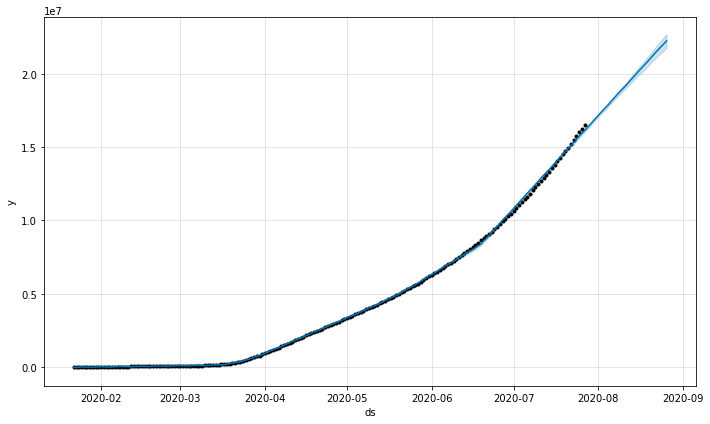

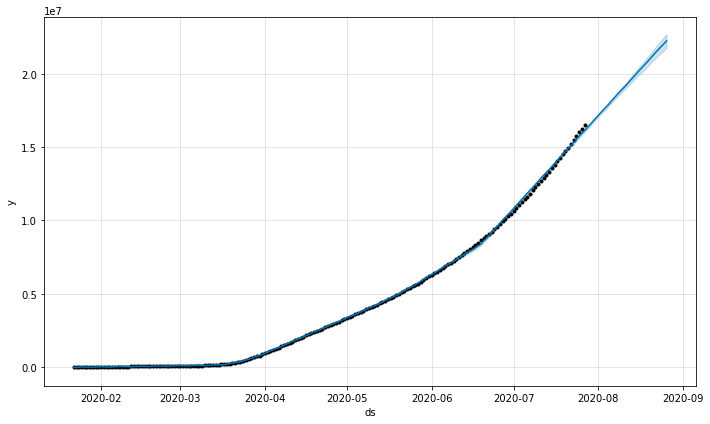

In [32]:
#### plot the predictions u will see these are with respect to yhat
model.plot(prediction)

In [ ]:
## The dark blue line in the graph represents the predicted values while the black dots represents the actual data in our dataset
### whereas light blue lines basically shows some trend

#### Conclusion--> This is what our prediction looks like. The direction of overall case numbers is probably true, u will observe how cases rises exponentially

##### visualize how trend & forecast actually happens

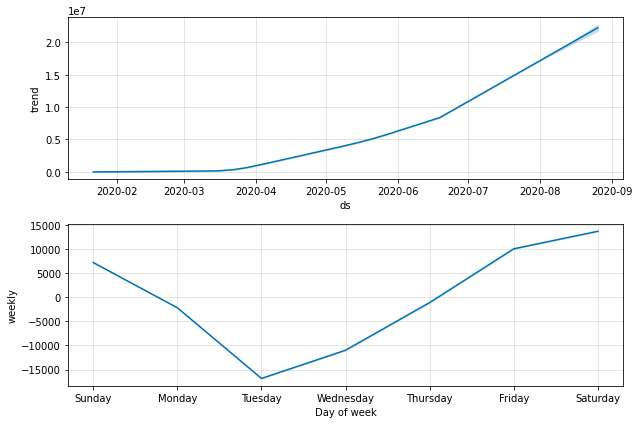

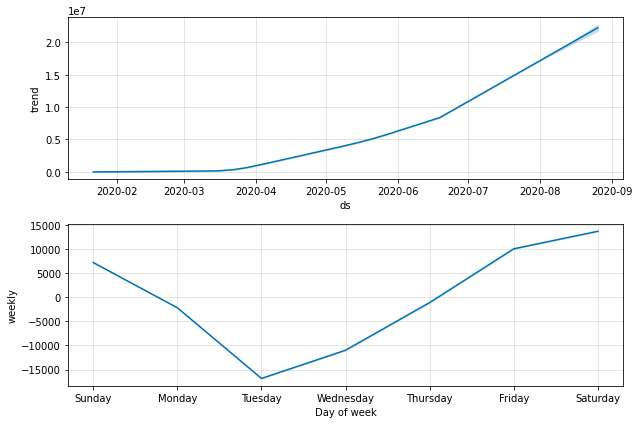

In [33]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)


## for Confirmed cases, trend is actually going to increase
## then we have weekly as well & this is basically for our new data

##### The prophet model identifies points at which the trend changes and those can be plotted.

In [34]:
from fbprophet.plot import add_changepoints_to_plot

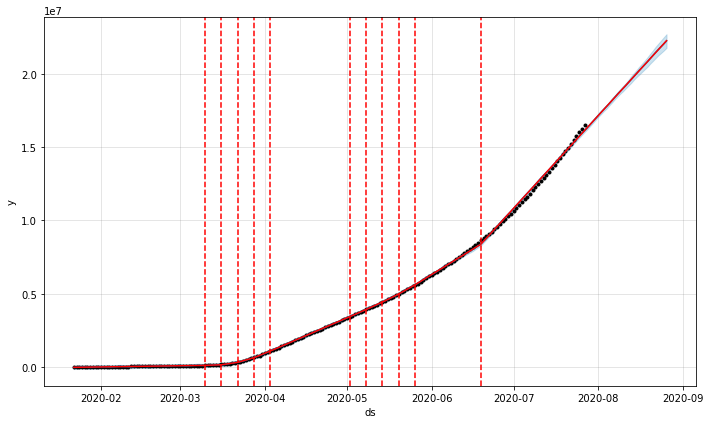

In [35]:
fig = model.plot(prediction)
### add_changepoints_to_plot(axes, prophet model, forecast values of Prophet)
a = add_changepoints_to_plot(fig.gca(), model,prediction)

#### The changepoints are shown in red by default Prophet used the first 80% of the dataset to establish the changepoints.  In this graph, it is nicely visible how the uncertainty increases into the future shown as light blue shade.

##### In a similar way, I can do prediction for a particular country,let say for china, India, US

### Cross Validation

In [38]:
df_prophet.shape

(188, 5)

In [36]:
### In this Cross Vallidation is not as same as of sklearn Cross validation bcz here we have to divide data on the basis of time-series
from fbprophet.diagnostics import cross_validation

In [40]:
df_cv=cross_validation(model,horizon="30 days",period='15 days',initial='90 days')
## horizon='365 days'--> for how many days we have to cross validate=====

## Computes forecasts from historical cutoff points Beginning from..

## (end - horizon) it means it is going to take that date that is (end - horizon) bcz on these date we have to just 
## cross-validate for the new dataset that we have to find out

## period=180 as from documentation of func as period=0.5*365=180 or {period=1/2*horizon value}
## initial -How many total no. of days we actually want-- 3*365 from documentation of function or  {initial=3*horizon}

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


In [41]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.196200e+06,3.206461e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279525e+06,3.291710e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.361468e+06,3.377906e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.439259e+06,3.463172e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.512941e+06,3.547318e+06,3515244,2020-04-28


In [42]:
df_cv.shape

(150, 6)

### Obtaining the Performance Metrics
#### We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [43]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.732177e+10,165292.978537,129431.475977,0.016894,0.017781,0.000000
1,4 days,3.783770e+10,194519.153621,151640.363022,0.019358,0.022609,0.000000
2,5 days,5.187132e+10,227752.759122,175493.706735,0.021809,0.025662,0.066667
3,6 days,6.958295e+10,263785.805797,202488.978430,0.024588,0.026660,0.133333
4,7 days,9.037899e+10,300630.981552,232841.149368,0.027870,0.031220,0.200000


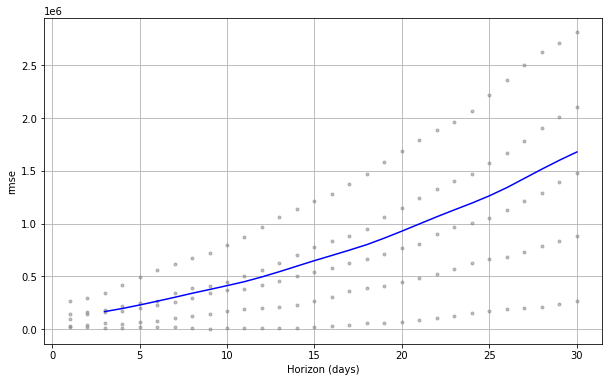

In [44]:
## lets say I have to plot trend of rmse, note: whenever rmse close to 10-15 is a good valuue for rmse
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')
#now u will see it looks good similarly u can do for mse as well

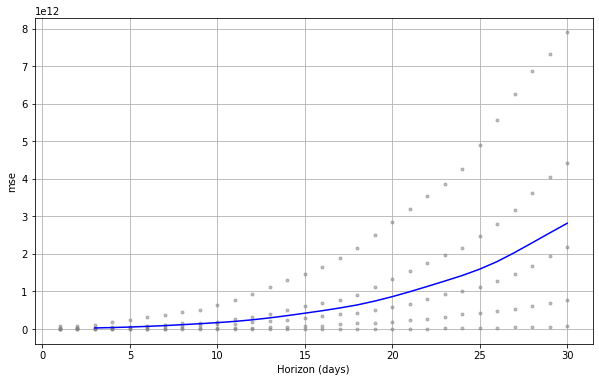

In [45]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mse')

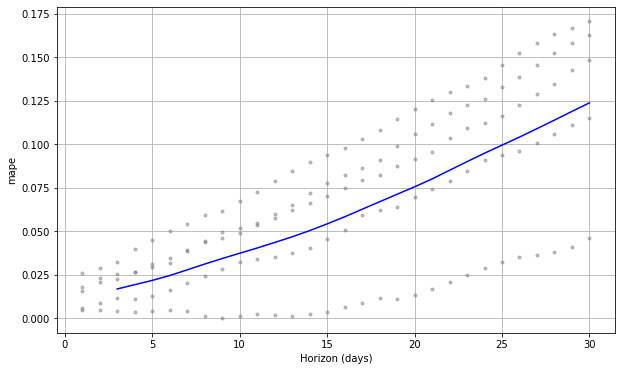

In [46]:
# Python
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')